<a href="https://colab.research.google.com/github/nschantz21/random_notebooks/blob/main/image_captioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl http://images.cocodataset.org/zips/val2014.zip --output val2014.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6337M  100 6337M    0     0  15.2M      0  0:06:54  0:06:54 --:--:-- 15.4M


In [2]:
!curl http://images.cocodataset.org/annotations/annotations_trainval2014.zip --output annotations.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  13.4M      0  0:00:17  0:00:17 --:--:-- 15.1M


# Image Captioning

This assignment is somewhat short.  We want you to spend your time on the project instead!

This assignment explores models connecting different modalities - exploring a connection between images and text.  By the time you're done this assignment, you'll:

* explored MS COCO captioning dataset
* investigated a few captioning techniques
* played with an image captioner


### Data

* Download the 2014 validation images, as well as their annotations from https://cocodataset.org/#download.  On a os x or linux, a command like ```curl http://images.cocodataset.org/zips/val2014.zip --output val2014.zip``` for each will do what you need.
* Unzip both files and name the corresponding directories `val2014` and `annotations` in this assignment directory.

### Explore the dataset
Look in the annotations directory.  Which file(s) contain the image captions?  Load those into memory here.  Your end goal is to generate a list of tuples for each of train2014 (you don't need the actual images to do this!) and val2014 i.e. ```[(391895, 'val2014/COCO_val2014_000000391895.jpg', 'A man with a red helmet on a small moped on a dirt road. '), ...]```

In [3]:
!unzip val2014.zip
!unzip annotations.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.jpg  
 extracting: val2014/COCO_val2014_000000564166.jpg  
 extracting: val2014/COCO_val2014_000000323327.jpg  
 extracting: val2014/COCO_val2014_000000338581.jpg  
 extracting: val2014/COCO_val2014_000000039656.jpg  
 extracting: val2014/COCO_val2014_000000071667.jpg  
 extracting: val2014/COCO_val2014_000000376046.jpg  
 extracting: val2014/COCO_val2014_000000066394.j

In [4]:
### YOUR CODE HERE

import json
import textwrap
from collections import defaultdict

wrapper = textwrap.TextWrapper(width=80)
val2014 = []
train2014 = []

with open('/content/annotations/captions_val2014.json') as ip_file:
    o = json.load(ip_file)
    img_dict = dict()
    annot_dict = dict()
    print(len(o["annotations"]), len(o["images"]))

    for x in o["images"]:
        img_dict[x["id"]] = "val2014/{}".format(x["file_name"])
    
    for x in o["annotations"]:
        val2014.append((x["image_id"], img_dict[x["image_id"]], x["caption"]))


with open('/content/annotations/captions_train2014.json') as ip_file:
    o = json.load(ip_file)
    img_dict = dict()
    annot_dict = dict()

    print(len(o["annotations"]), len(o["images"]))

    for x in o["images"]:
        img_dict[x["id"]] = "train2014/{}".format(x["file_name"])
    for x in o["annotations"]:
        train2014.append((x["image_id"], img_dict[x["image_id"]], x["caption"]))
    

### END YOUR CODE

202654 40504
414113 82783


In [5]:
assert (479495,
  'train2014/COCO_train2014_000000479495.jpg',
  'A bicycle is parked by a bench at night.') in train2014
assert (203564,
  'val2014/COCO_val2014_000000203564.jpg',
  'A black metal bicycle with a clock inside the front wheel.') in val2014

In [6]:
# Cell if you want to write code to answer the questions below.

# number of unique images
print("{} Unique images in the training set".format(len(set(map(lambda x: x[1], filter(lambda x: len(x[2]) > 0, train2014))))))

# avg number of annotions in training
train_dict = defaultdict(list)
for x in train2014:
    train_dict[x[0]].append(x)

print(len(train_dict.keys()))
print("avg captions: {}".format(sum(map(len, train_dict.values())) / len(train_dict.keys())))

# how many words
words_set = set()
for x in train2014: words_set.update(set(x[2].split(" ")))

print(len(words_set))

82783 Unique images in the training set
82783
avg captions: 5.0023917954169335
45186


### Questions (Part A)

1. How many images do we have captions for in the training set?
2. How many captions do we have per image (rounded to nearest integer)?
3. If you just split on whitespace and do nothing else, how many words are in the vocabulary?

Given your answer to 3, think about what you might need to do with that few examples and that large of a vocabulary?  (Use pretrained embeddings from a massive semi-supervised dataset, keeping only the top-k tokens, smarter tokenization, ...).  You don't need to write your answer anywhere, but given how often these problems arise in NLP, you should be feeling more confident at this point in the course how to handle these situations!

## Let's look at some of the examples!

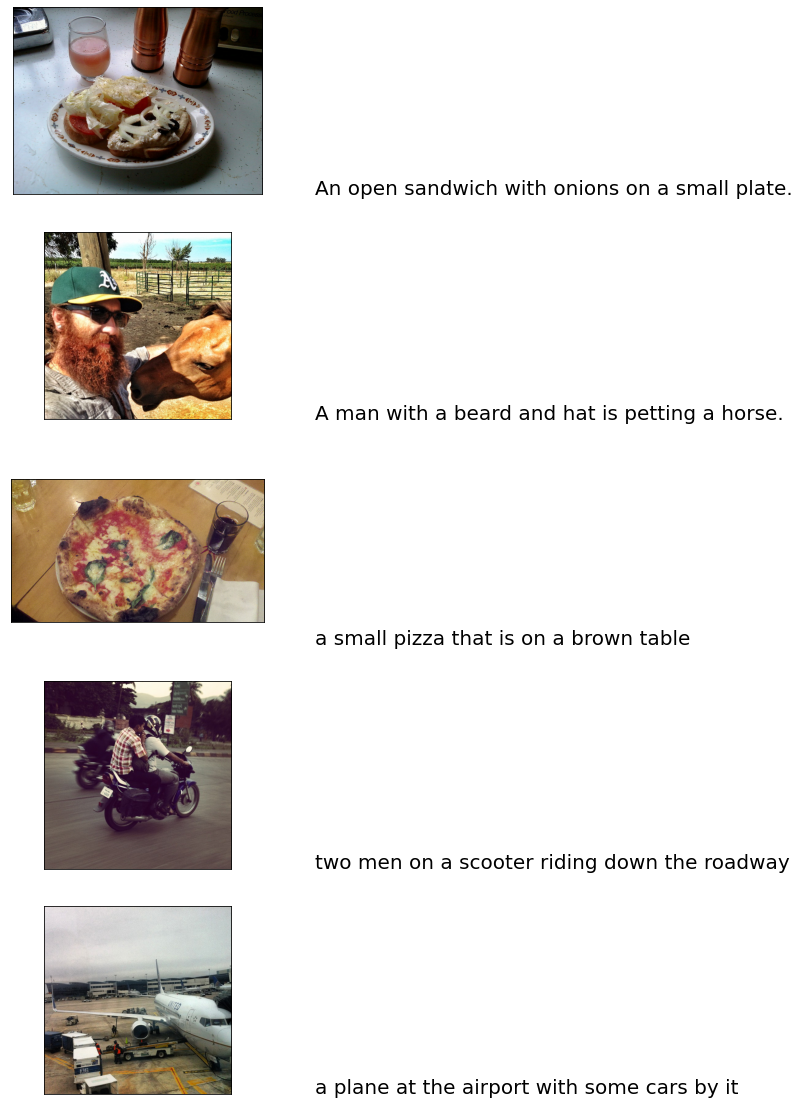

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import random

samples = 5
n = 1
fig = plt.figure(figsize=(10,20))
for i in range(samples):
    image_caption = val2014[random.randint(0, len(val2014))]
    image_load = load_img(image_caption[1])
    
    ax = fig.add_subplot(samples,2,n,xticks=[],yticks=[])
    ax.imshow(image_load)
    n += 1
    
    ax = fig.add_subplot(samples,2,n)
    plt.axis('off')
    ax.plot()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.text(0, 0, image_caption[2], fontsize=20)
    n += 1
plt.show()

# Foundational image captioning papers

## Show & Tell

[Show and Tell: A Neural Image Caption Generator](https://arxiv.org/pdf/1411.4555.pdf) was the first step towards neural image captioning.  Fundamentally it is a encoder-decoder scheme similar to what we've seen in class.  Concretely, it uses the CNN structure of a (at the time) state of the art image classification CNN as the encoder and it uses a LSTM as a decoder.  As in the generation models in class, it continues to generate text until a special "stop" token is emitted.  After **reading** the paper, answer the following questions:

### Questions (Part B)

1.  What parts of the CNN were trained?
The CNN wasn't retrained, they used model pre-trained on ImageNet; however, they added a dropoutlayer and tried some ensembling, playing with the capacity of the model.

2.  What was the biggest conern when deciding?
overfitting

3.  How was the encoded image representation input into the decoder?
The last hidden layer of the CNN was used as an input for the decoder, and put into the LSTM once, at time t=-1.

4.  Given we are "translating" from an image to a caption (without a length constraint), which evaluation metric did the authors determine was reasonable for a top line metric?
BLEU-4

5.  What beam width is equivalent to one where you select the highest probability word in each decoding step?
1

6.  How many points of quality did using a beam search of 20 provide versus a greedy search?
2 BLEU points on average

7.  Where did the authors get their word embeddings from?
A large news corpus

8.  Approximately how often were there novel sentences in the top-15 generated text candidates, despite overfitting issues?
50%


## Deep visual alignment

[Deep Visual-Semantic Alignments for Generating Image Descriptions](https://cs.stanford.edu/people/karpathy/cvpr2015.pdf) is a fun read for which we will ask no questions.  Its critical insights are around understanding an image as a composition of regions, and building upon that understanding to construct both a caption for the whole image, but labels for its consistuent parts.

## Show, Attend & Tell

[Show, Attend & Tell](https://arxiv.org/pdf/1502.03044.pdf) applies the same "provide the decoder more context, as directly as possible" trick we've seen over the course: adding attention.  After **skimming** the paper, answer the following questions:

### Questions (Part C)

1. What is the attention over?  
The image

2. What do the figures with highlight shading represent in Figures 2, 3 and 5?  
The focus of the attention on the image.



# Exploring a MS COCO captioner

There are many examples of image captioners ML engineers have built on the MS COCO dataset you explored. [This one](https://replicate.com/rmokady/clip_prefix_caption) uses a (more) modern large language model as its decoder, GPT-2.  

* **Explore** the samples and play with using beam search and not.  What do you notice?

This is an example from the Show & Tell paper of a low-quality caption (see figure 5).  The GPT-2 model proposes "the car that person drove to the hospital." vs. "A yellow school bus parked in a parking lot" from the original paper. ![Misclassified](littlecar.png) 